In [3]:
%matplotlib inline
import pandas as pd

In [4]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [46]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,Entre hermanos,1984
1,Warning: Apocalypse 2012,2012
2,One Dark Night,1939
3,Jungle Siren,1942
4,Shreelancer,2017


In [6]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### What are the ten most common movie names of all time?

In [7]:
movie_counts = titles['title'].value_counts()

In [8]:
movie_counts.head(10)

title
Hamlet                  20
Carmen                  17
Macbeth                 16
The Outsider            12
The Three Musketeers    11
Temptation              11
Freedom                 11
Othello                 11
Maya                    11
Honeymoon               10
Name: count, dtype: int64

### Which three years of the 1930s saw the most films released?

In [13]:
year_counts = titles[ (titles.year >= 1930) & (titles.year < 1940) ].year.value_counts()

In [14]:
year_counts

year
1937    1217
1938    1161
1936    1153
1939    1084
1935    1057
1934     984
1932     939
1931     906
1933     901
1930     843
Name: count, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

<Axes: title={'center': 'Number of films by decade'}, xlabel='year', ylabel='# of films'>

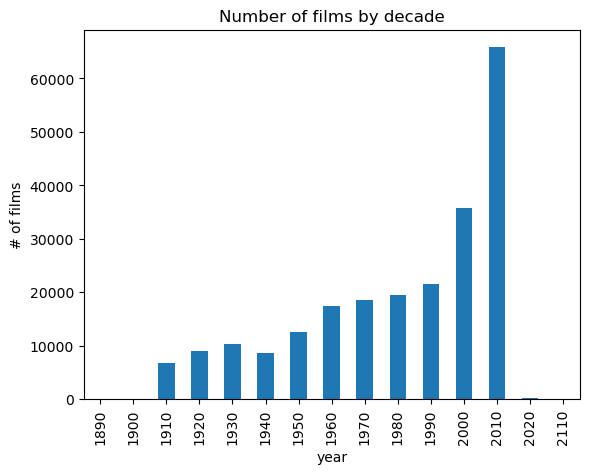

In [44]:
import matplotlib.pyplot as plt
by_decade = titles.year // 10 * 10
by_decade_values = by_decade.value_counts()
by_decade_sorted = by_decade_values.sort_index()
plt.xlabel('year')
plt.ylabel('# of films')
plt.title('Number of films by decade')
by_decade_sorted.plot(kind='bar')


### Plot the number of "Hamlet" films made each decade.

<Axes: xlabel='year'>

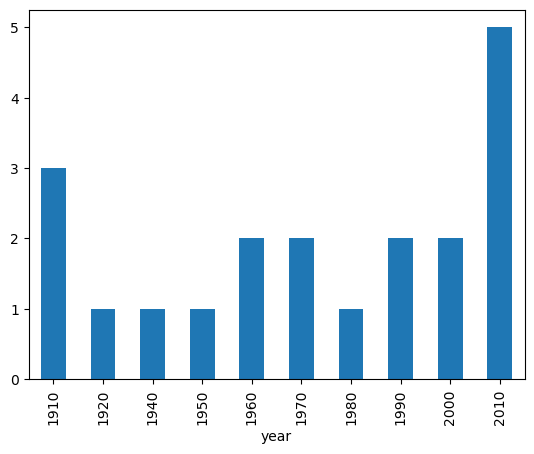

In [53]:
hamlet_films = titles[ titles.title == 'Hamlet' ]
hamlet_films_by_decade = hamlet_films.year // 10 * 10
hamlet_films_by_decade.value_counts().sort_index().plot(kind='bar')

### Plot the number of "Rustler" characters in each decade of the history of film.

<Axes: xlabel='year'>

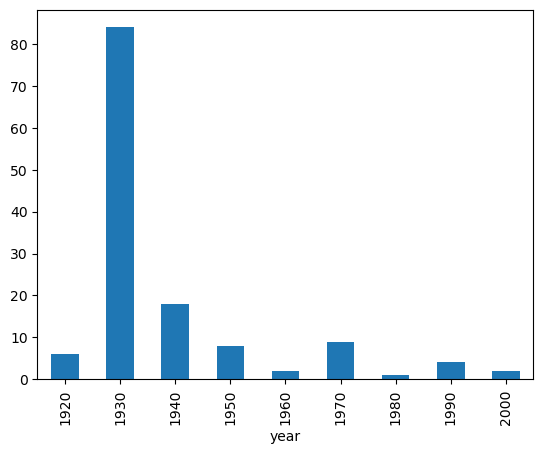

In [56]:
rustlers = cast[cast.character == "Rustler"]
rustlers_by_decade = rustlers.year // 10 * 10
rustlers_by_decade.value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" characters each decade.

<Axes: xlabel='year'>

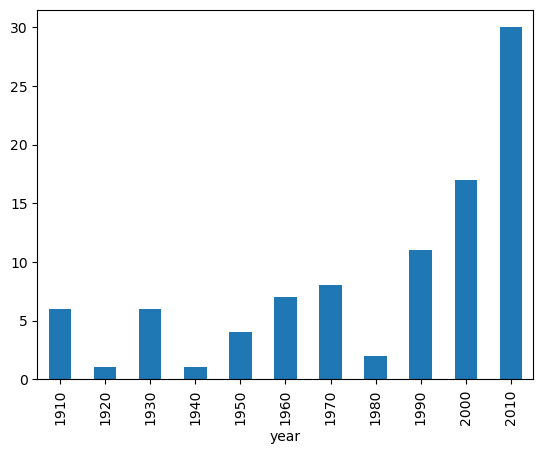

In [58]:
hamlets = cast[cast.character == "Hamlet"]
hamlets_by_decade = hamlets.year // 10 * 10
hamlets_by_decade.value_counts().sort_index().plot(kind='bar')

### What are the 11 most common character names in movie history?

In [66]:
cast.character.value_counts().sort_values(ascending=False).head(11)

character
Himself        19637
Dancer         12019
Extra          10848
Reporter        7818
Doctor          6963
Party Guest     6786
Student         6631
Policeman       6424
Bartender       6290
Herself         6269
Minor Role      6203
Name: count, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [69]:
cast[ cast.character == "Herself" ].name.value_counts().head(10)

name
Queen Elizabeth II        11
María Luisa (V) Martín     9
Luisa Horga                9
Joyce Brothers             8
Margaret Thatcher          8
Hillary Clinton            8
Sumie Sakai                6
Marta Berrocal             6
Inés J. Southern           6
Rekha                      6
Name: count, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [70]:
cast[ cast.character == "Himself" ].name.value_counts().head(10)

name
Adolf Hitler          91
Richard Nixon         43
Ronald Reagan         37
John F. Kennedy       35
Winston Churchill     24
George W. Bush        24
Martin Luther King    23
Bill Clinton          22
Benito Mussolini      21
Ron Jeremy            20
Name: count, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [72]:
cast[ cast.year == 1945 ].name.value_counts().head()

name
Emmett Vogan       37
Sam (II) Harris    31
Bess Flowers       28
Harold Miller      28
Franklyn Farnum    27
Name: count, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [73]:
cast[ cast.year == 1985 ].name.value_counts().head()

name
Mammootty        22
Sukumari         20
Shakti Kapoor    19
Raj Babbar       15
Mohanlal         15
Name: count, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

<Axes: xlabel='year'>

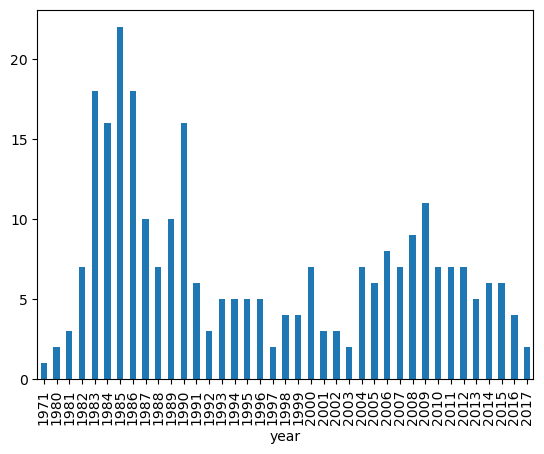

In [77]:
cast[ cast.name == "Mammootty" ].year.value_counts().sort_index().plot(kind='bar')

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [83]:
cast[ cast.character.str.startswith('Patron in') == True ].character.value_counts().sort_values(ascending=False).head(10)

character
Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       8
Patron in Billiard Parlor        5
Patron in restaurant             3
Patron in cabaret                3
Patron in Club                   3
Patron in Restaurant             3
Patron in Bar                    3
Patron in booth                  2
Name: count, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [84]:
cast[ cast.character.str.startswith('Science') == True ].character.value_counts().sort_values(ascending=False).head(10)

character
Science Teacher         57
Science Fair Student     9
Science Student          6
Science Fair Judge       6
Science Kid              5
Science Fair Kid         5
Science Reporter         5
Science                  4
Science Officer          3
Science teacher          3
Name: count, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

<Axes: xlabel='year', ylabel='n'>

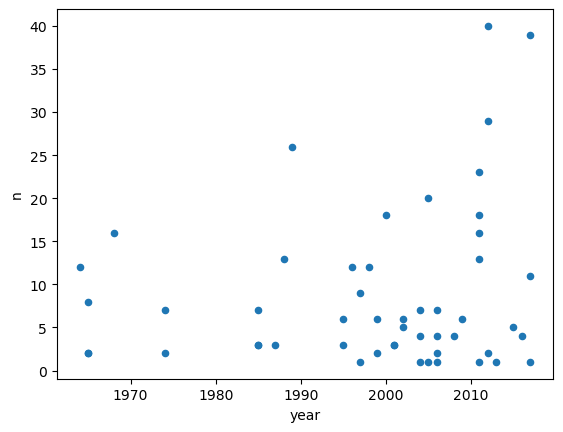

In [111]:
cast[ cast.name == "Judi Dench" ].sort_values(ascending=True, by='year').plot(kind='scatter', x='year', y='n')

### Plot the n-values of Cary Grant's roles through his career.

<Axes: xlabel='year', ylabel='n'>

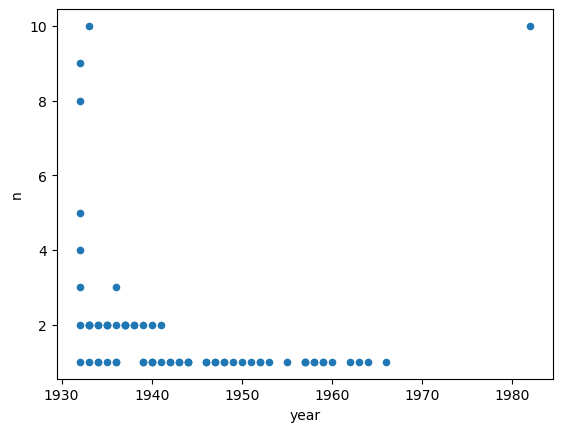

In [112]:
cast[ cast.name == "Cary Grant" ].sort_values(ascending=True, by='year').plot(kind='scatter', x='year', y='n')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

<Axes: xlabel='year', ylabel='n'>

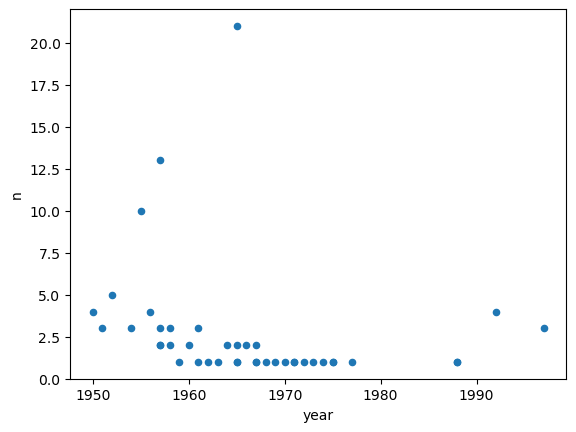

In [113]:
cast[ cast.name == "Sidney Poitier" ].sort_values(ascending=True, by='year').plot(kind='scatter', x='year', y='n')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [117]:
cast[ (cast.n == 1) & (cast.year >= 1950) & (cast.year < 1960) ].type.value_counts()

type
actor      6482
actress    2985
Name: count, dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [119]:
cast[ (cast.n == 2) & (cast.year >= 1950) & (cast.year < 1960) ].type.value_counts()

type
actor      4520
actress    4496
Name: count, dtype: int64